# Viewing 3D Data (MRI) Using Matplotlib

<IPython.core.display.Javascript object>


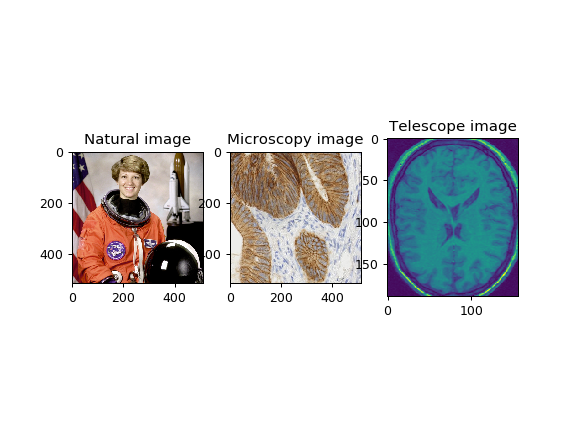

Text(0.5,1,'Telescope image')

In [46]:
#https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data

%matplotlib notebook 
import matplotlib.pyplot as plt
from skimage import data
import tempfile
from urllib import urlretrieve
import os
import zipfile
import nibabel

astronaut = data.astronaut()
ihc = data.immunohistochemistry()
hubble = data.hubble_deep_field()

# Initialize the subplot panels side by side
fig, ax = plt.subplots(nrows=1, ncols=3)

# Show an image in each subplot
ax[0].imshow(astronaut)
ax[0].set_title('Natural image')
ax[1].imshow(ihc)
ax[1].set_title('Microscopy image')
ax[2].imshow(hubble)
ax[2].set_title('Telescope image')

In [50]:
d=tempfile.mkdtemp()

os.path.basename('http://google.com/attention.zip')

url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip'

fn, info = urlretrieve(url, os.path.join(d, 'attention.zip'))


In [51]:
zipfile.ZipFile(fn).extractall(path=d)

In [52]:
[f.filename for f in zipfile.ZipFile(fn).filelist[:10]]

['attention/',
 'attention/multi_block_regressors.mat',
 'attention/README_DATA.txt',
 'attention/factors.mat',
 'attention/functional/',
 'attention/functional/snffM00587_0201.hdr',
 'attention/functional/snffM00587_0040.img',
 'attention/functional/snffM00587_0458.hdr',
 'attention/functional/snffM00587_0185.img',
 'attention/functional/snffM00587_0018.hdr']

In [53]:
# Read the image 
struct = nibabel.load(os.path.join(d, 'attention/structural/nsM00587_0002.hdr'))

# Get a plain NumPy array, without all the metadata
struct_arr = struct.get_data()

In [54]:
struct_arr.shape

(157, 189, 68)

In [55]:
struct_arr[75].shape

(189, 68)

<IPython.core.display.Javascript object>


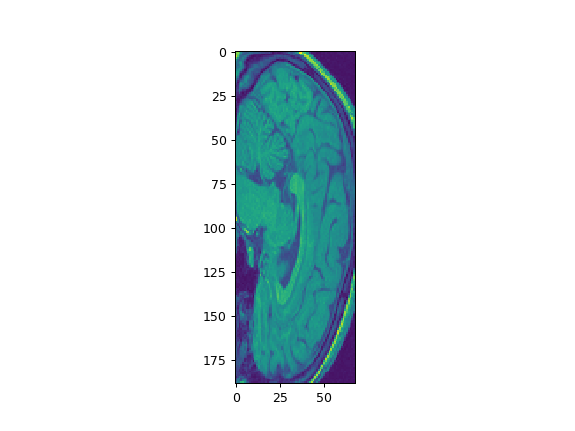

In [56]:
plt.imshow(struct_arr[75])

<IPython.core.display.Javascript object>


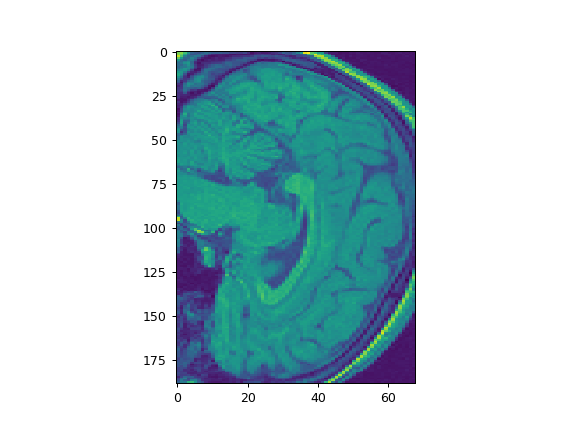

In [57]:
plt.imshow(struct_arr[75], aspect=0.5)

<IPython.core.display.Javascript object>


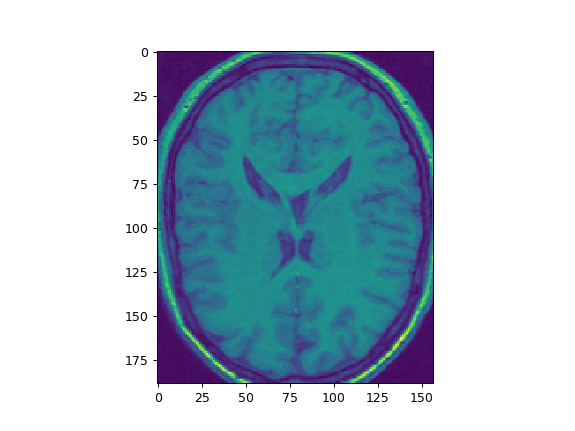

In [58]:
struct_arr2 = struct_arr.T
plt.imshow(struct_arr2[34])

In [59]:
struct_arr2.shape

(68, 189, 157)

<IPython.core.display.Javascript object>


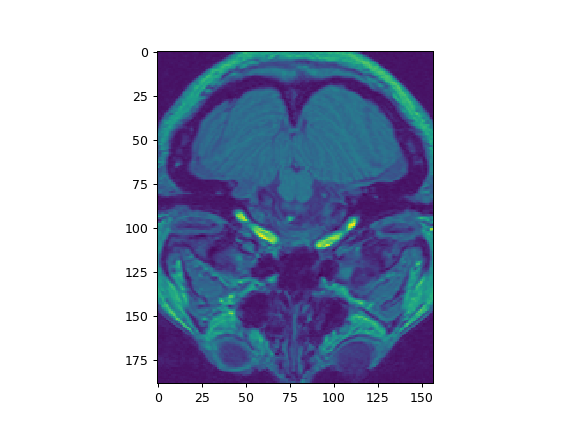

In [60]:
plt.imshow(struct_arr2[0])

In [82]:
def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])
    
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)
                
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

<IPython.core.display.Javascript object>


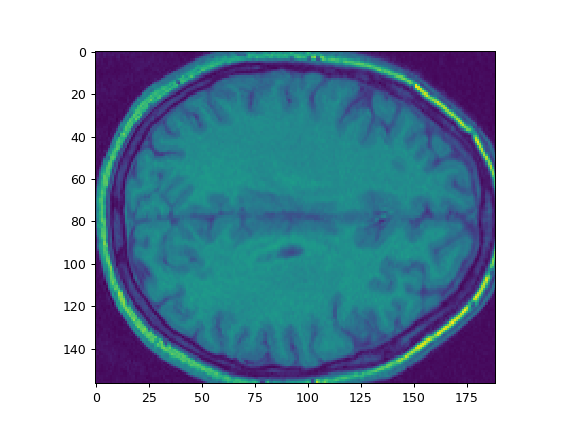

7

In [94]:
fig, ax = plt.subplots()
ax.imshow(struct_arr[..., 40])
fig.canvas.mpl_connect('key_press_event', process_key)

<IPython.core.display.Javascript object>


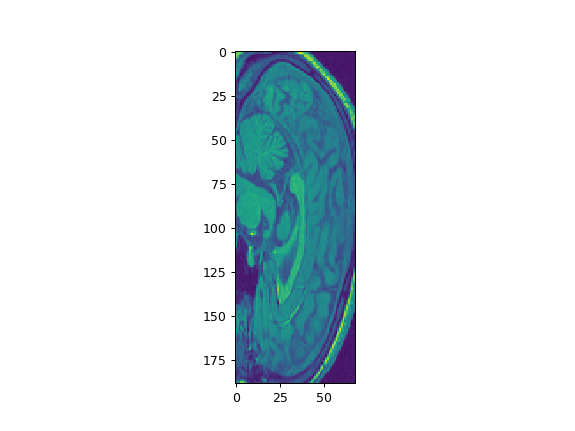

In [81]:
multi_slice_viewer(struct_arr)